In [92]:
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [93]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [94]:
#Importing Configs
# Define the path where config.py is located
#Mac
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
#Linux
#os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
database_file = config.database
database_folder = config.database_folder
bert_models = config.bert_models
bert_models_local = config.bert_models_local
Sentiment_models = config.Sentiment_models
finbert_models = config.finbert_models
database = config.Local_Database

Body = config.Body
Model = config.Model
Model_Subfolder = f'/{Body} Texts/{Model}'
#Model_Folder = config.texts
# Model_Folder = config.Sentiment_models
# Model_Folder = Model_Folder + Model_Subfolder
Model_Folder = config.Sentiment_models

Body_2 = config.Body_2
Model_2 = config.Model_2
Model_Subfolder_2 = f'/{Body_2} Texts/{Model_2}'
Model_Folder_2 = config.texts
Model_Folder_2 = Model_Folder_2 + Model_Subfolder_2


/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [95]:
df1 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short.csv")
df2 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short_2.csv")

In [96]:
Fed_list = ["Speeches","Minutes", "Beige Book"]
ECB_list = ["Speeches", "Monetary policy decisions", "Economic Bulletin"]

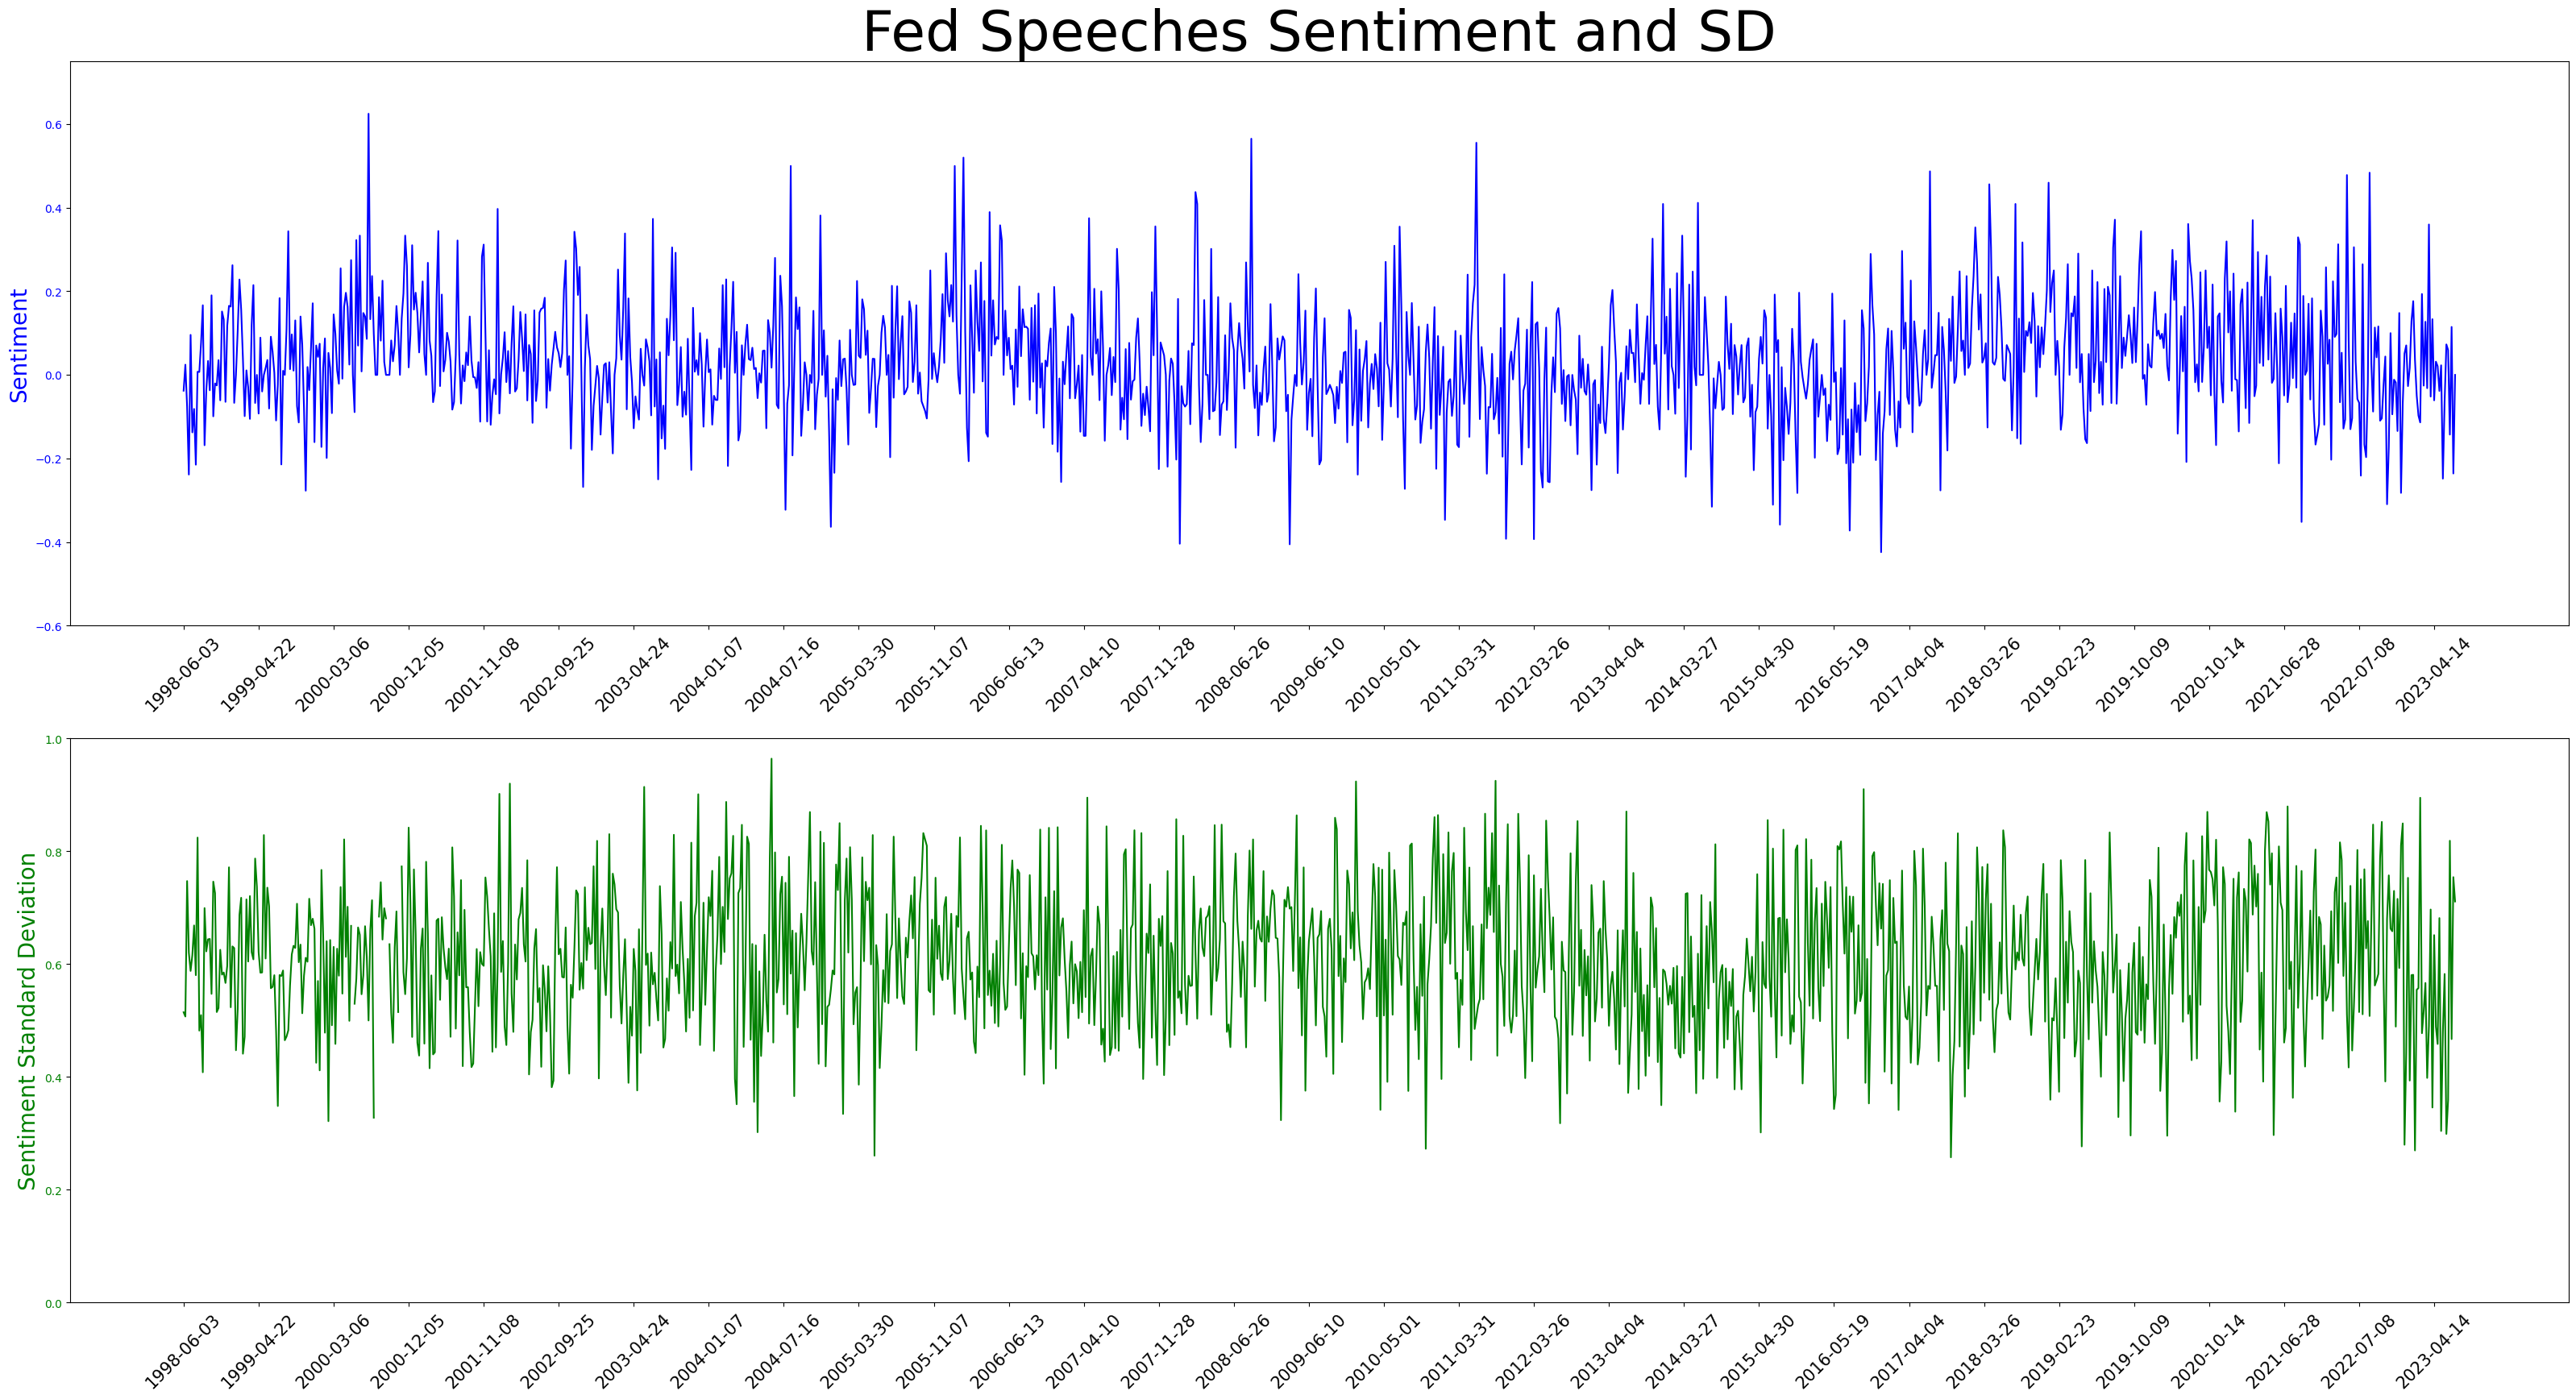

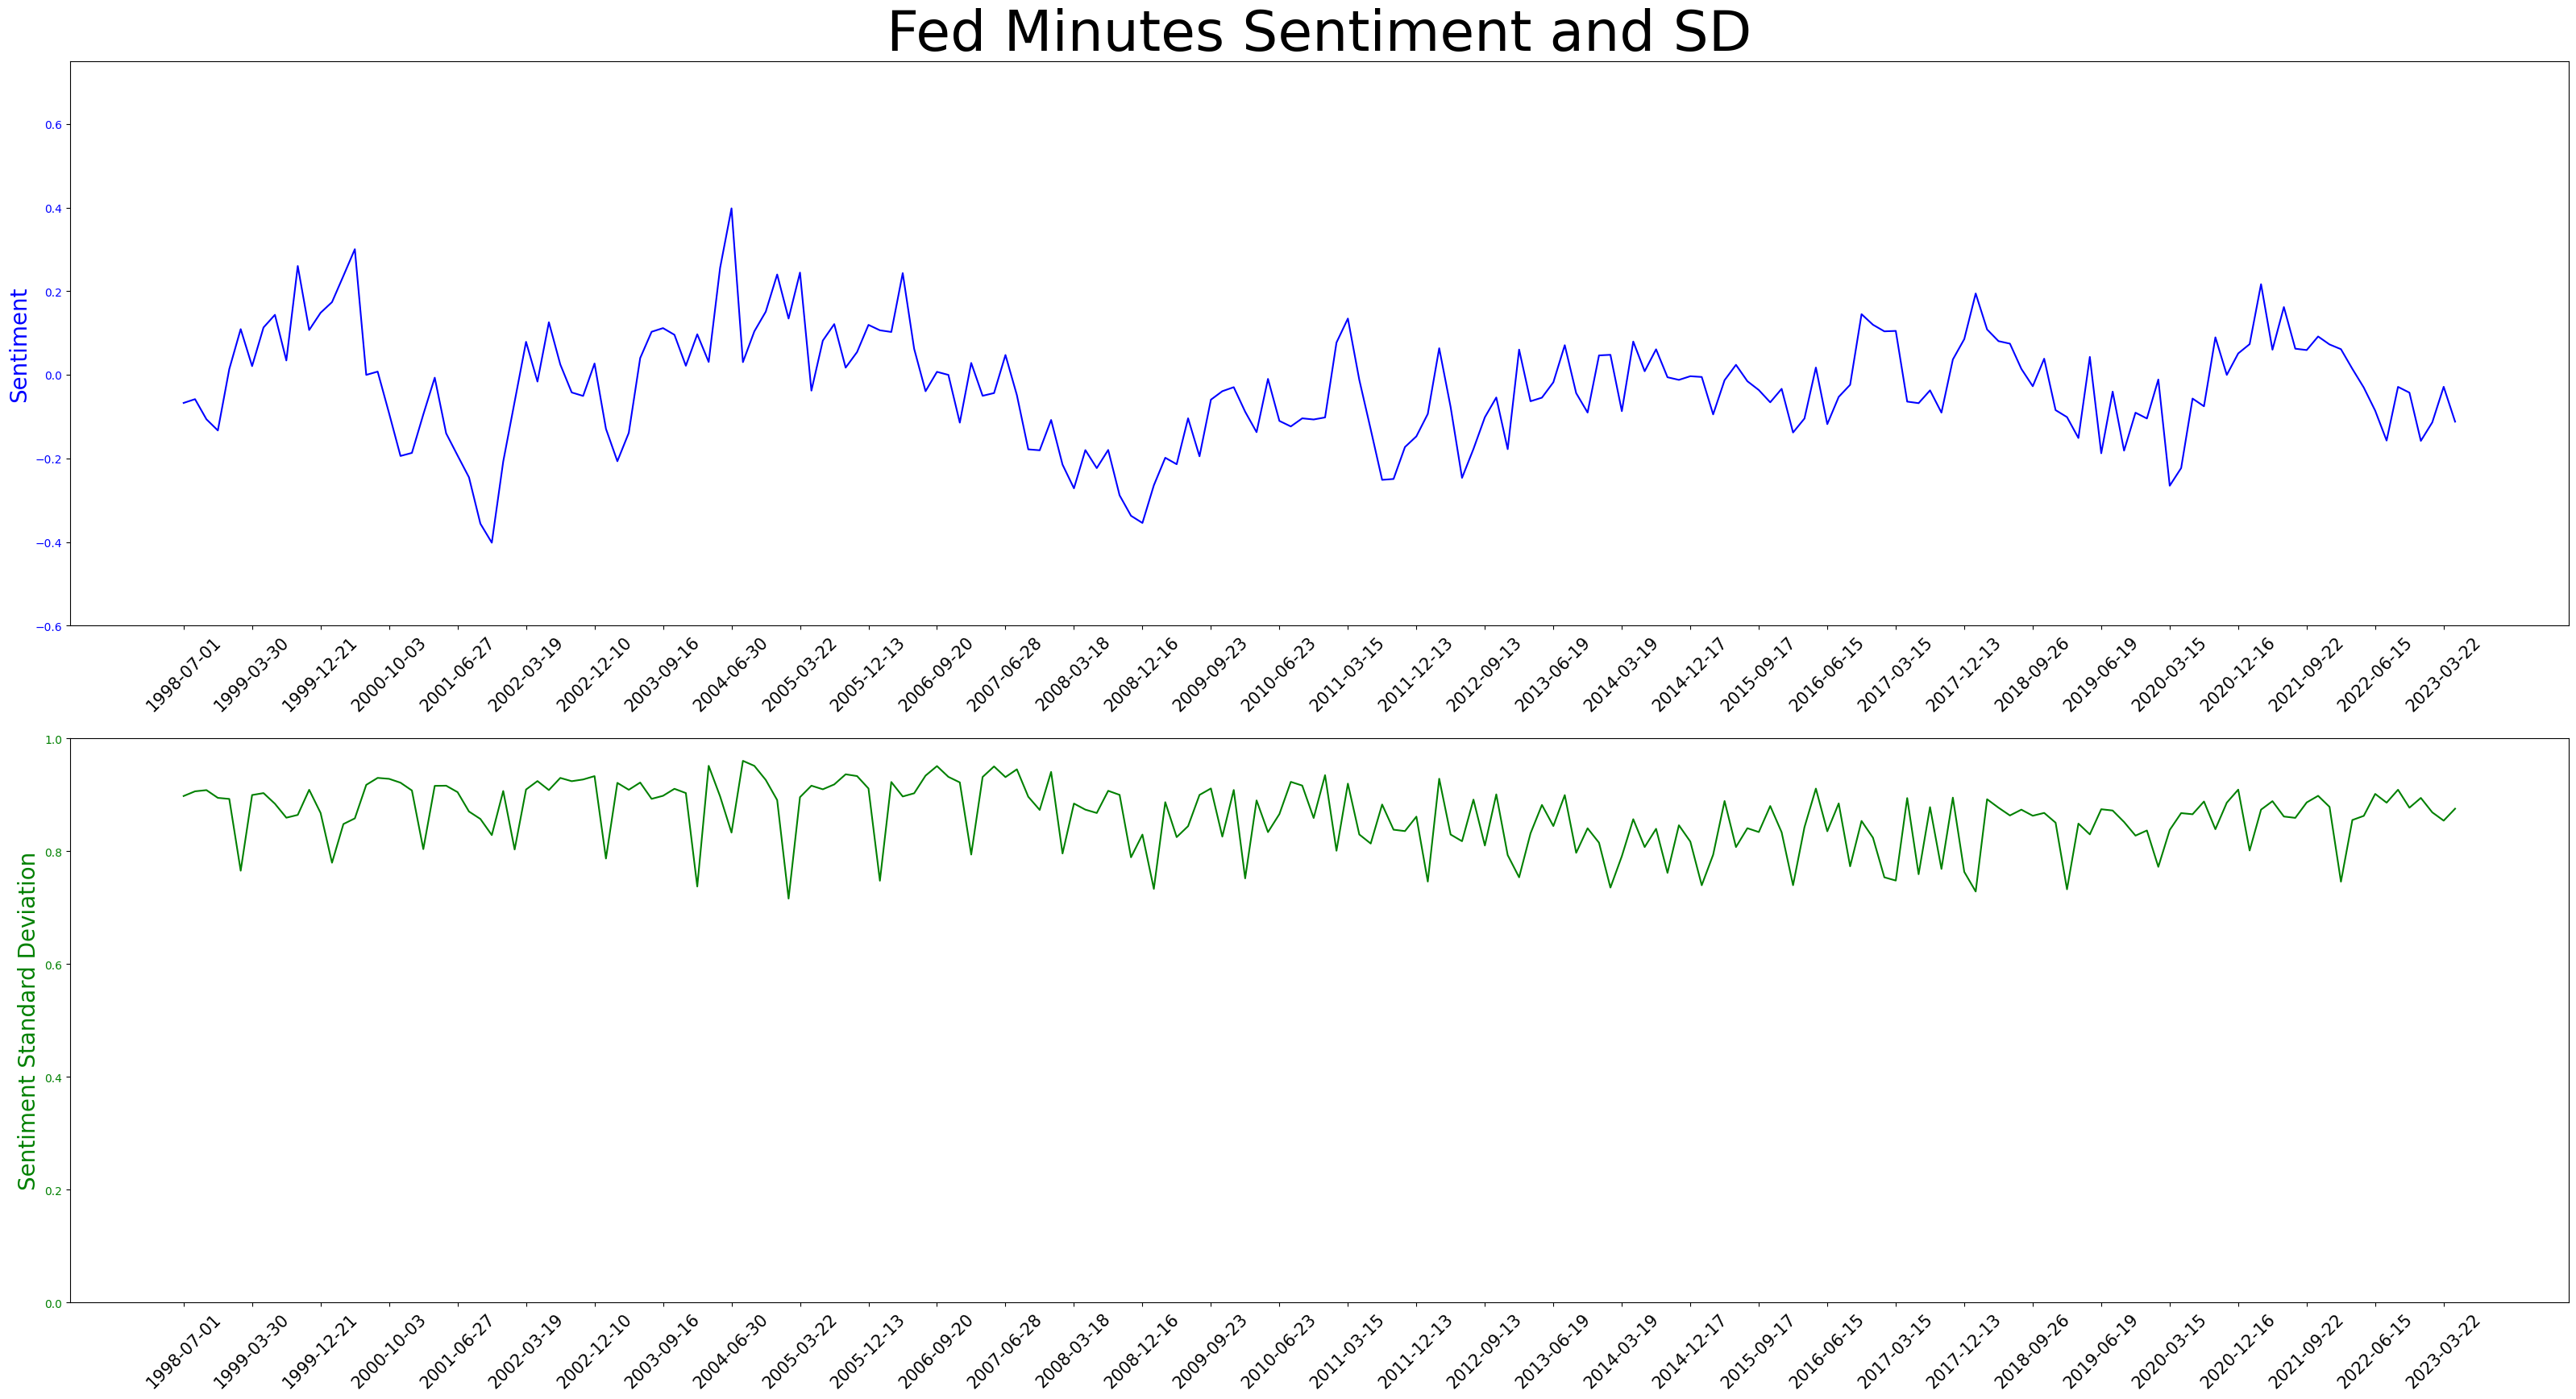

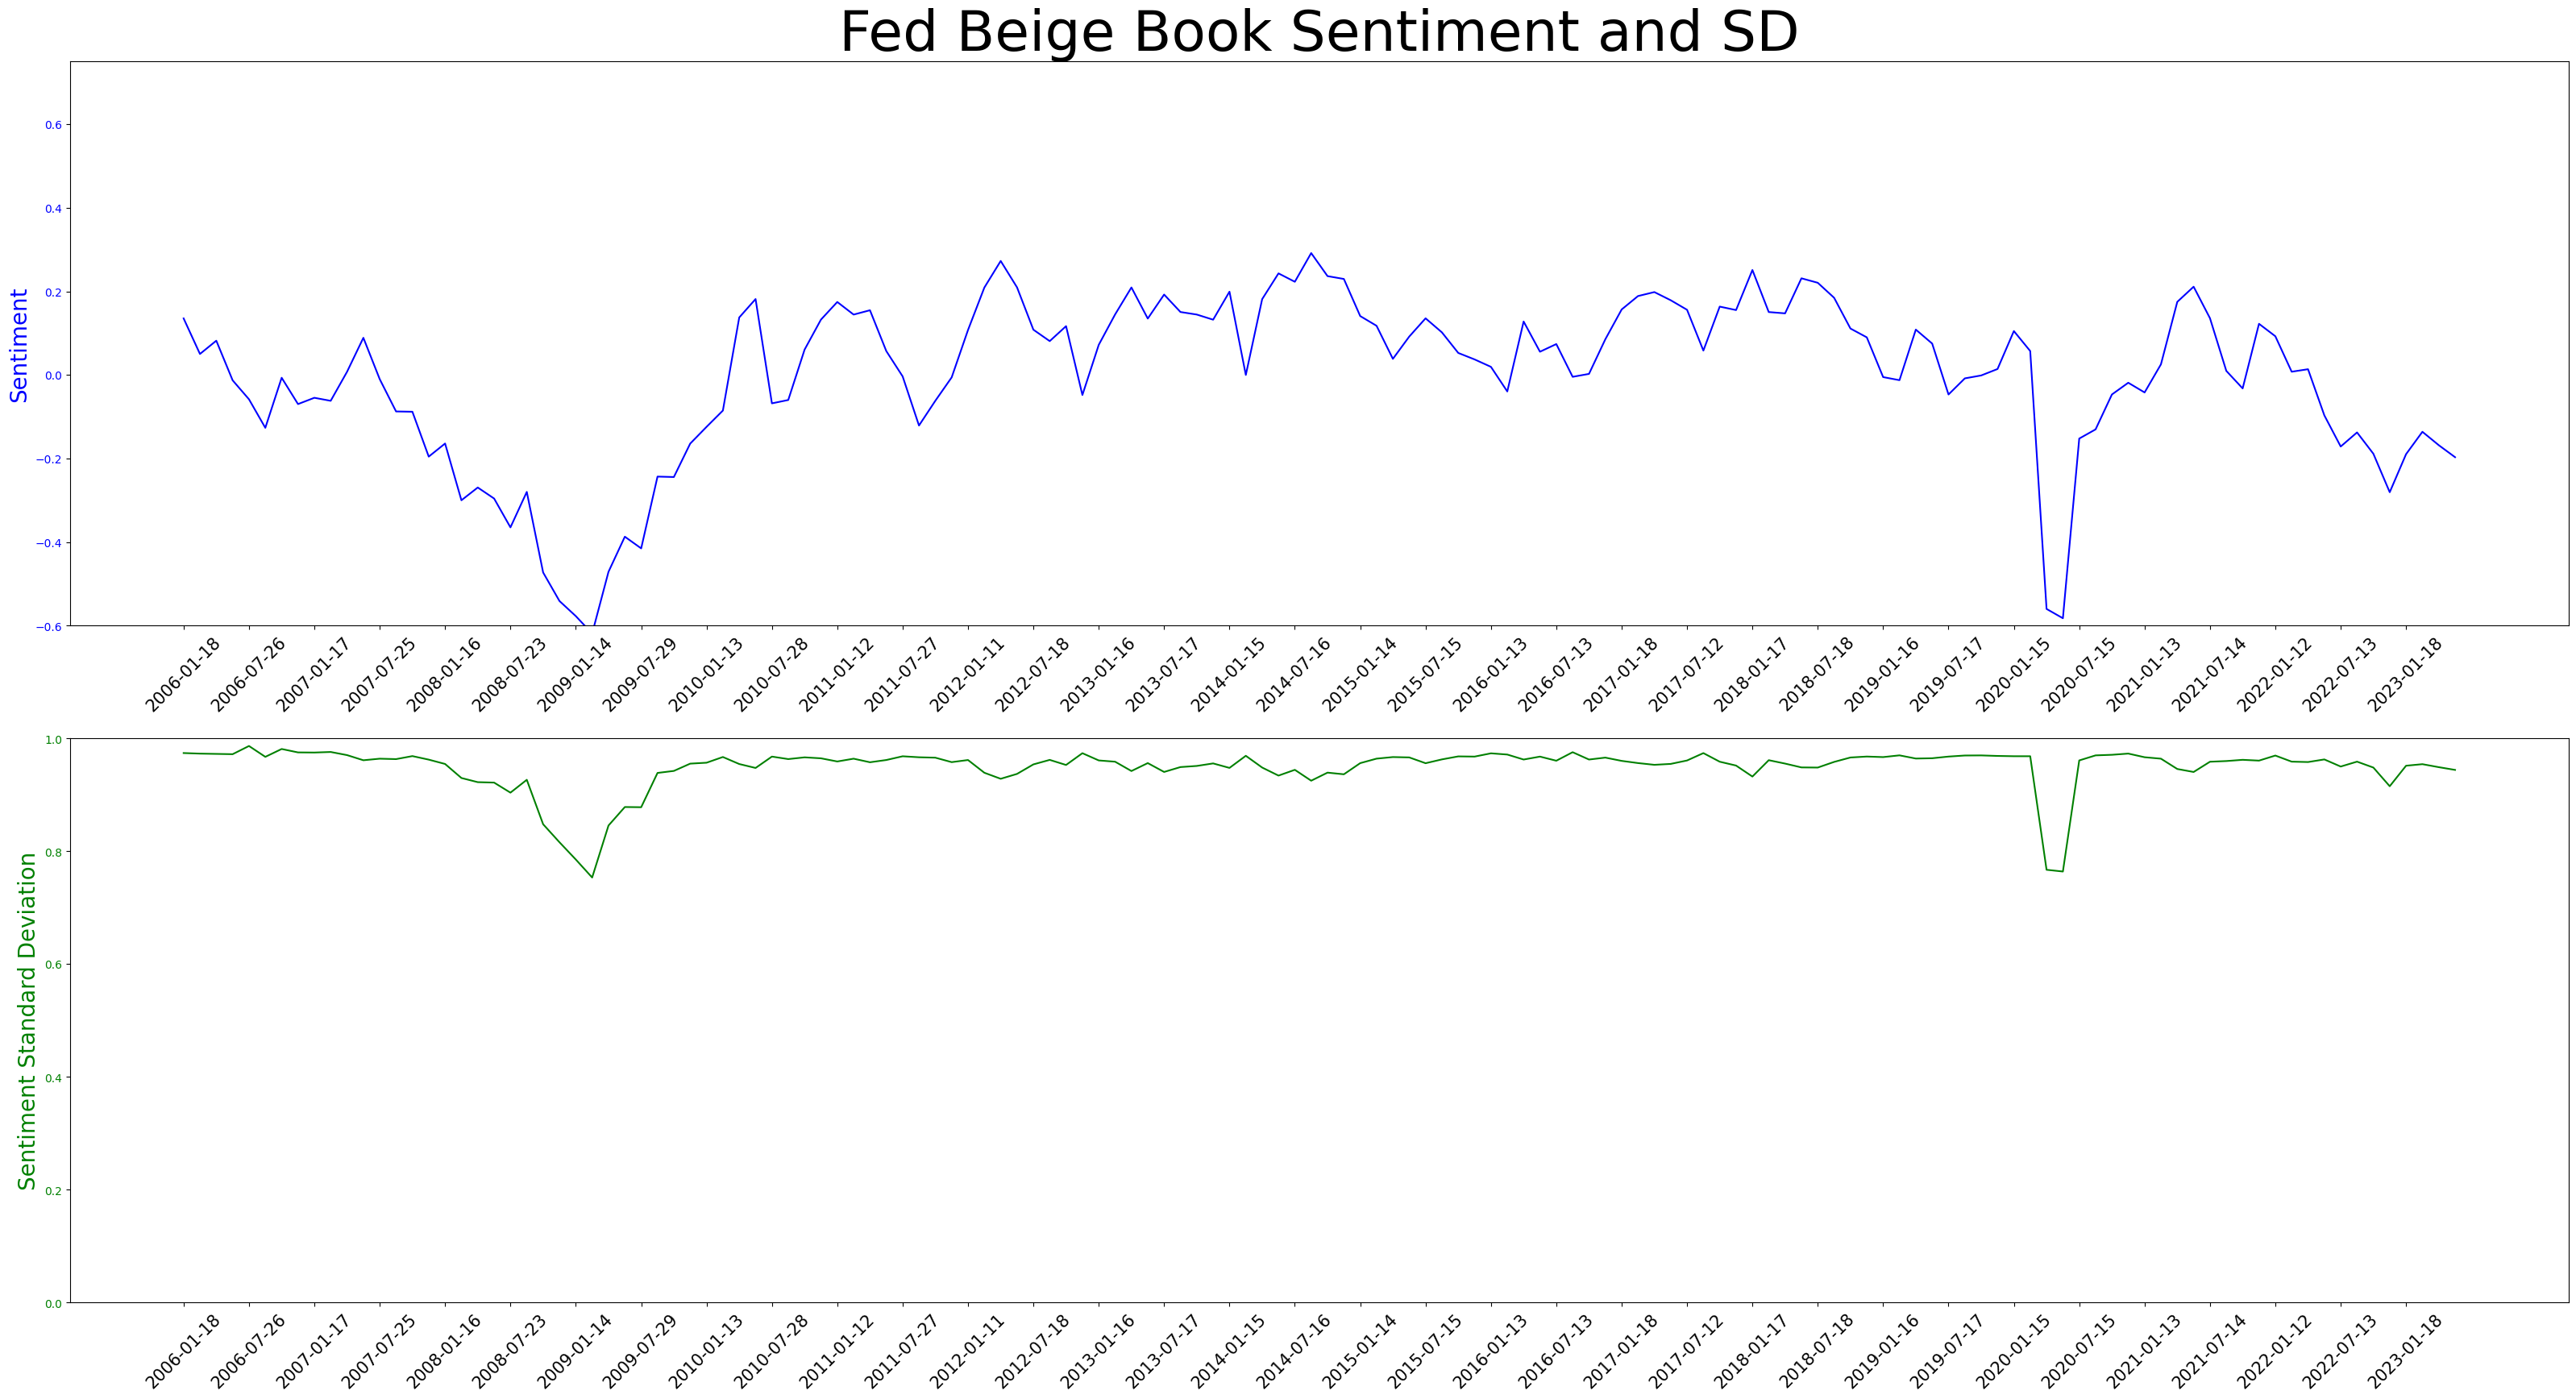

In [97]:

for i in Fed_list:
    Body = "Fed"
    Model = i
    Model_Subfolder = f'/{Body} Texts/{Model}'
    Model_Folder = config.Sentiment_models
    df1 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short.csv")
    df2 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short_2.csv")
    
    df_var = df1[['date', 'sentiment']]
    df_var = df_var.groupby(['date']).agg(["mean", "median", "var"]).reset_index()
    df_var.columns = ['_'.join(col).strip() for col in df_var.columns.values]
    df_var = df_var.rename(columns={'date_': 'date'})
    df_var['sentiment_sd'] = df_var['sentiment_var']**0.5
    df_var = df_var.rename(columns={'sentiment_sd': 'sd'})
    
    df1 = df1[['date',  'positive', 'negative', 'neutral', 'sentiment']]
    df1 = df1.groupby(['date']).mean().reset_index()
        
    # Create a list of x-axis tick positions
    num_ticks = 30  # Adjust this number as needed
    x_tick_positions_0 = df1['date'].iloc[::len(df1) // num_ticks].tolist()
    x_tick_positions_1 = df_var['date'].iloc[::len(df_var) // num_ticks].tolist()

    fig, axs = plt.subplots(2, 1, figsize=(40, 20))
    #axs = [axs, axs.twiny()]

    axs[0].plot(df1['date'], df1['sentiment'], color='blue')

    #axs[1] = axs[0].twinx()
    axs[1].plot(df_var['date'], df_var['sd'], color='green')

    axs[0].tick_params(axis='y', labelcolor='blue')
    axs[1].tick_params(axis='y', labelcolor='green')

    # Set Y axis scales so that they both fit evenly on the chart
    axs[0].set_ylim(-0.6, 0.75)
    axs[1].set_ylim(0, 1)

    axs[0].set_xticks(x_tick_positions_0)
    axs[1].set_xticks(x_tick_positions_1)

    axs[0].tick_params(axis='x', rotation=45, labelsize=15)
    axs[1].tick_params(axis='x', rotation=45, labelsize=15)

    axs[0].set_ylabel('Sentiment', color='blue', fontsize=20)
    axs[1].set_ylabel('Sentiment Standard Deviation', color='green', fontsize=20)

    axs[0].set_title(f'{Body} {Model} Sentiment and SD', fontsize=50)

    #Set graph name for output file 
    graph_name = f"{Body}_{Model}_Sentiment_SD.png"
    plt.savefig(f"/Users/kylenabors/Documents/Database/Other Data/Graph Photos/{graph_name}")
    plt.show()

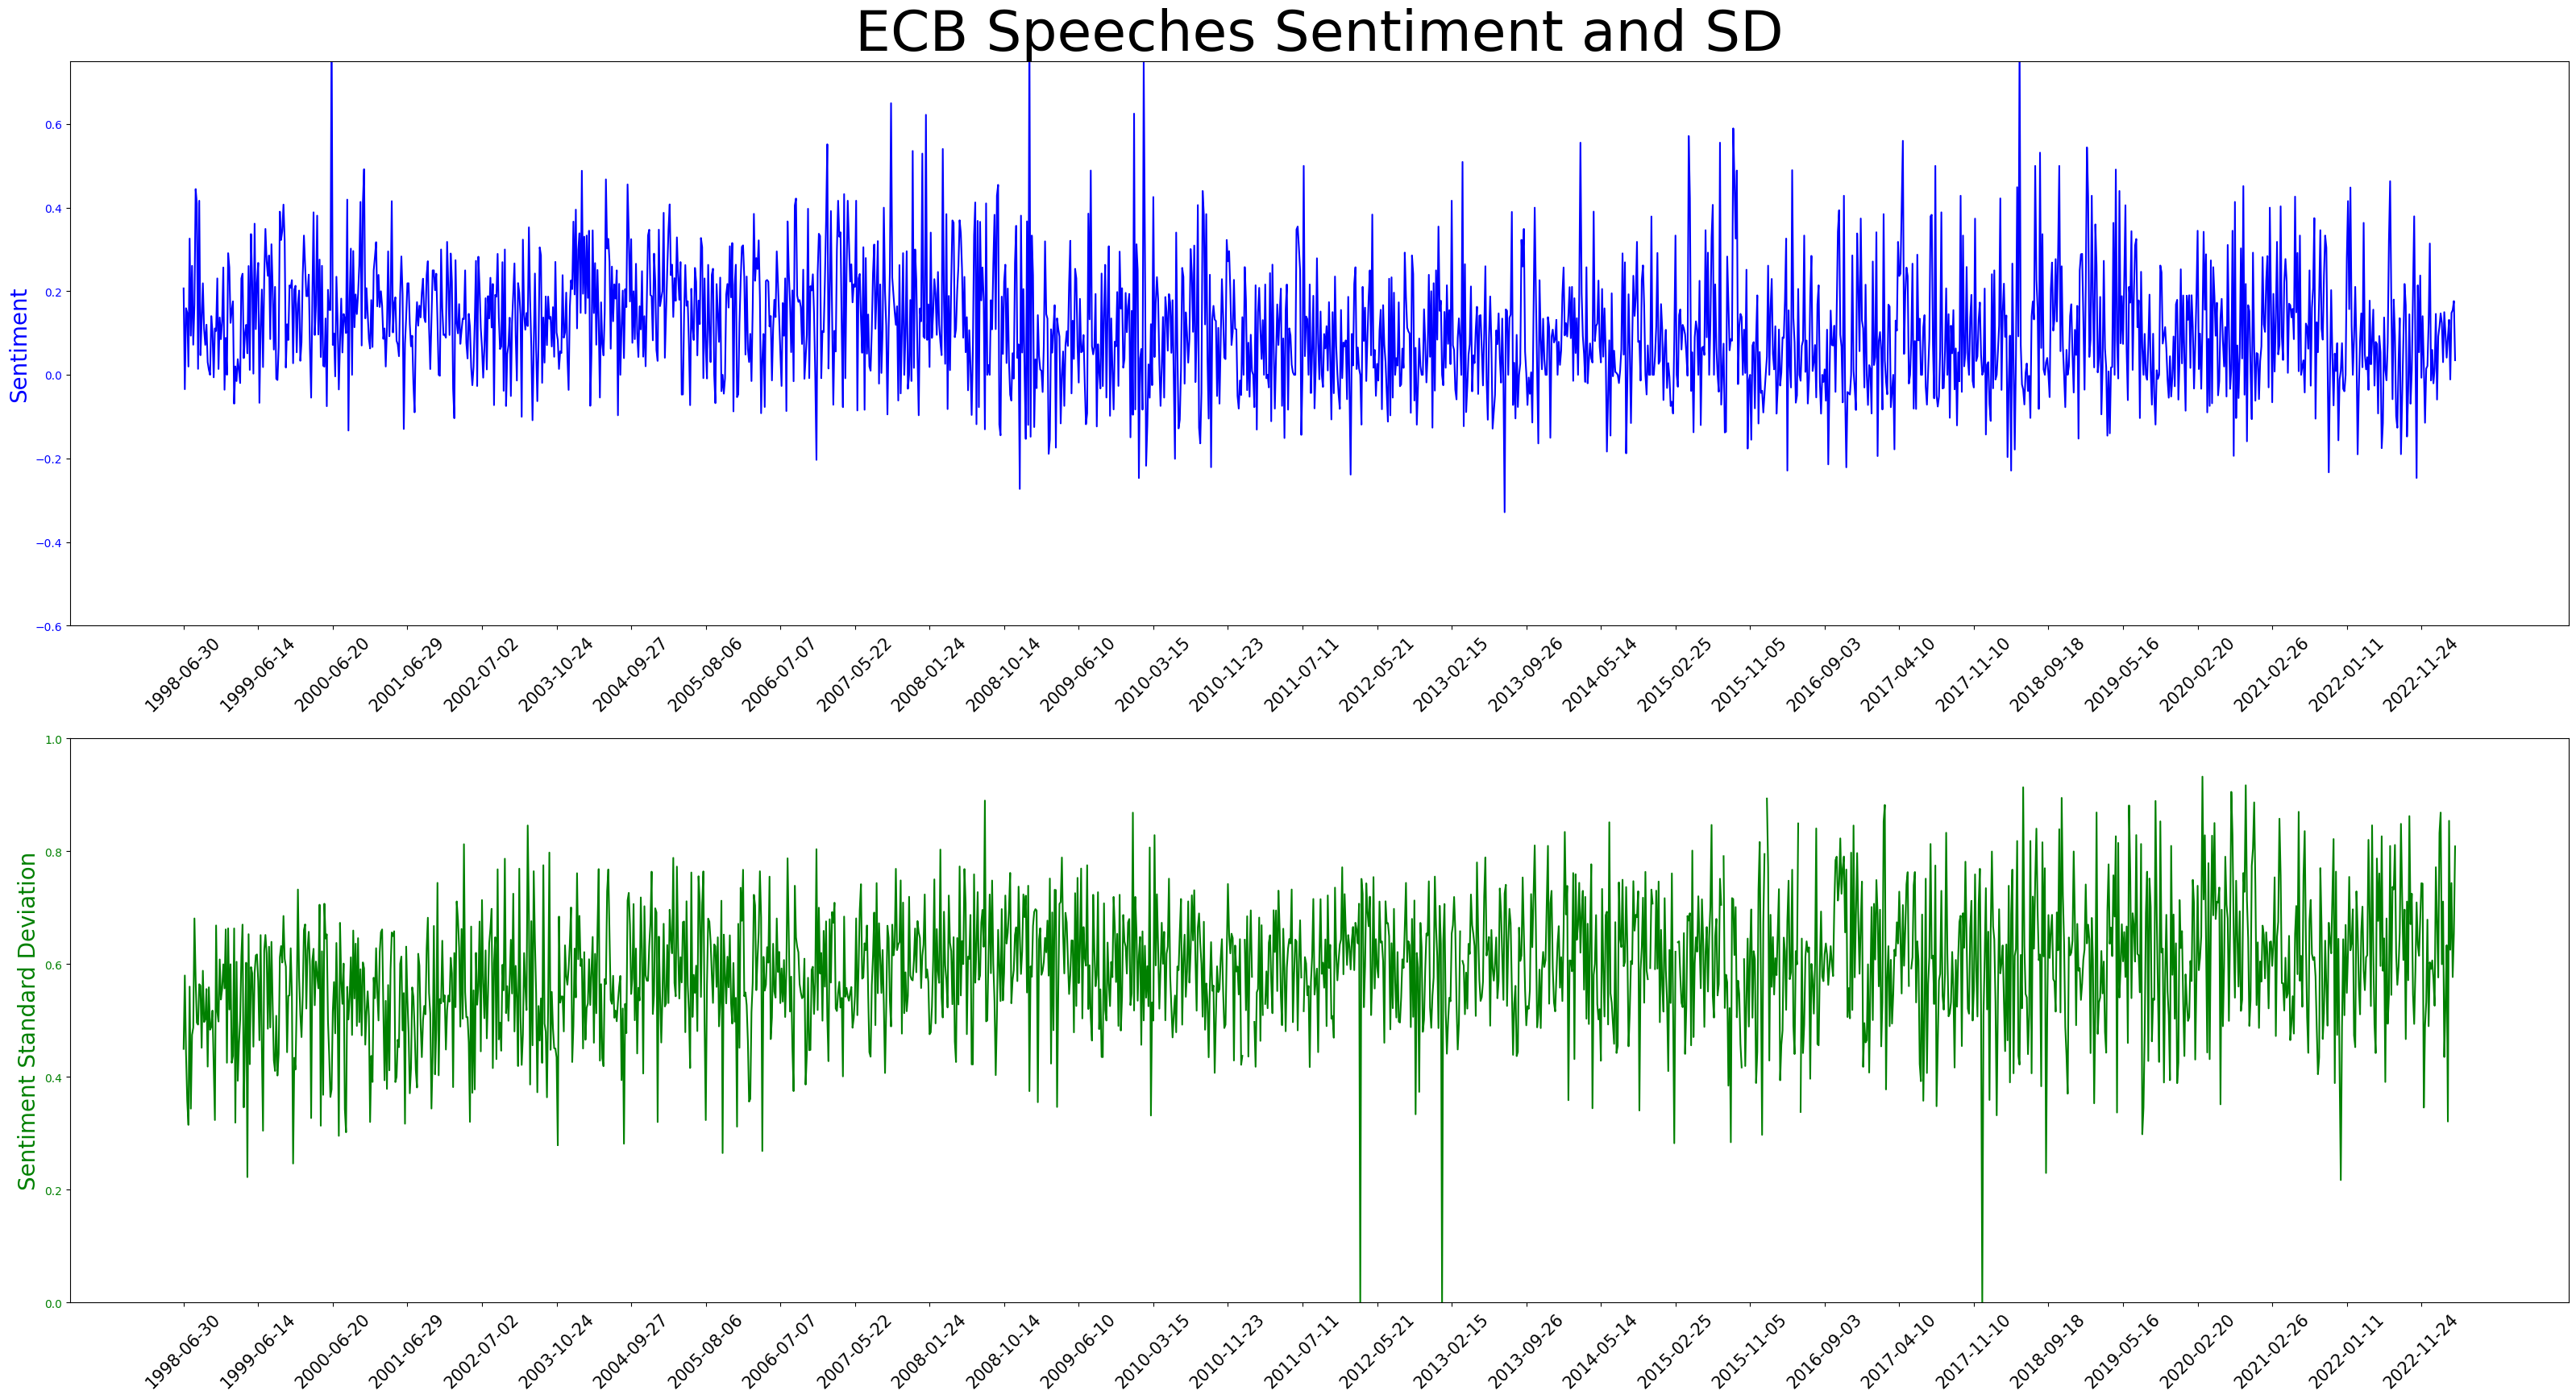

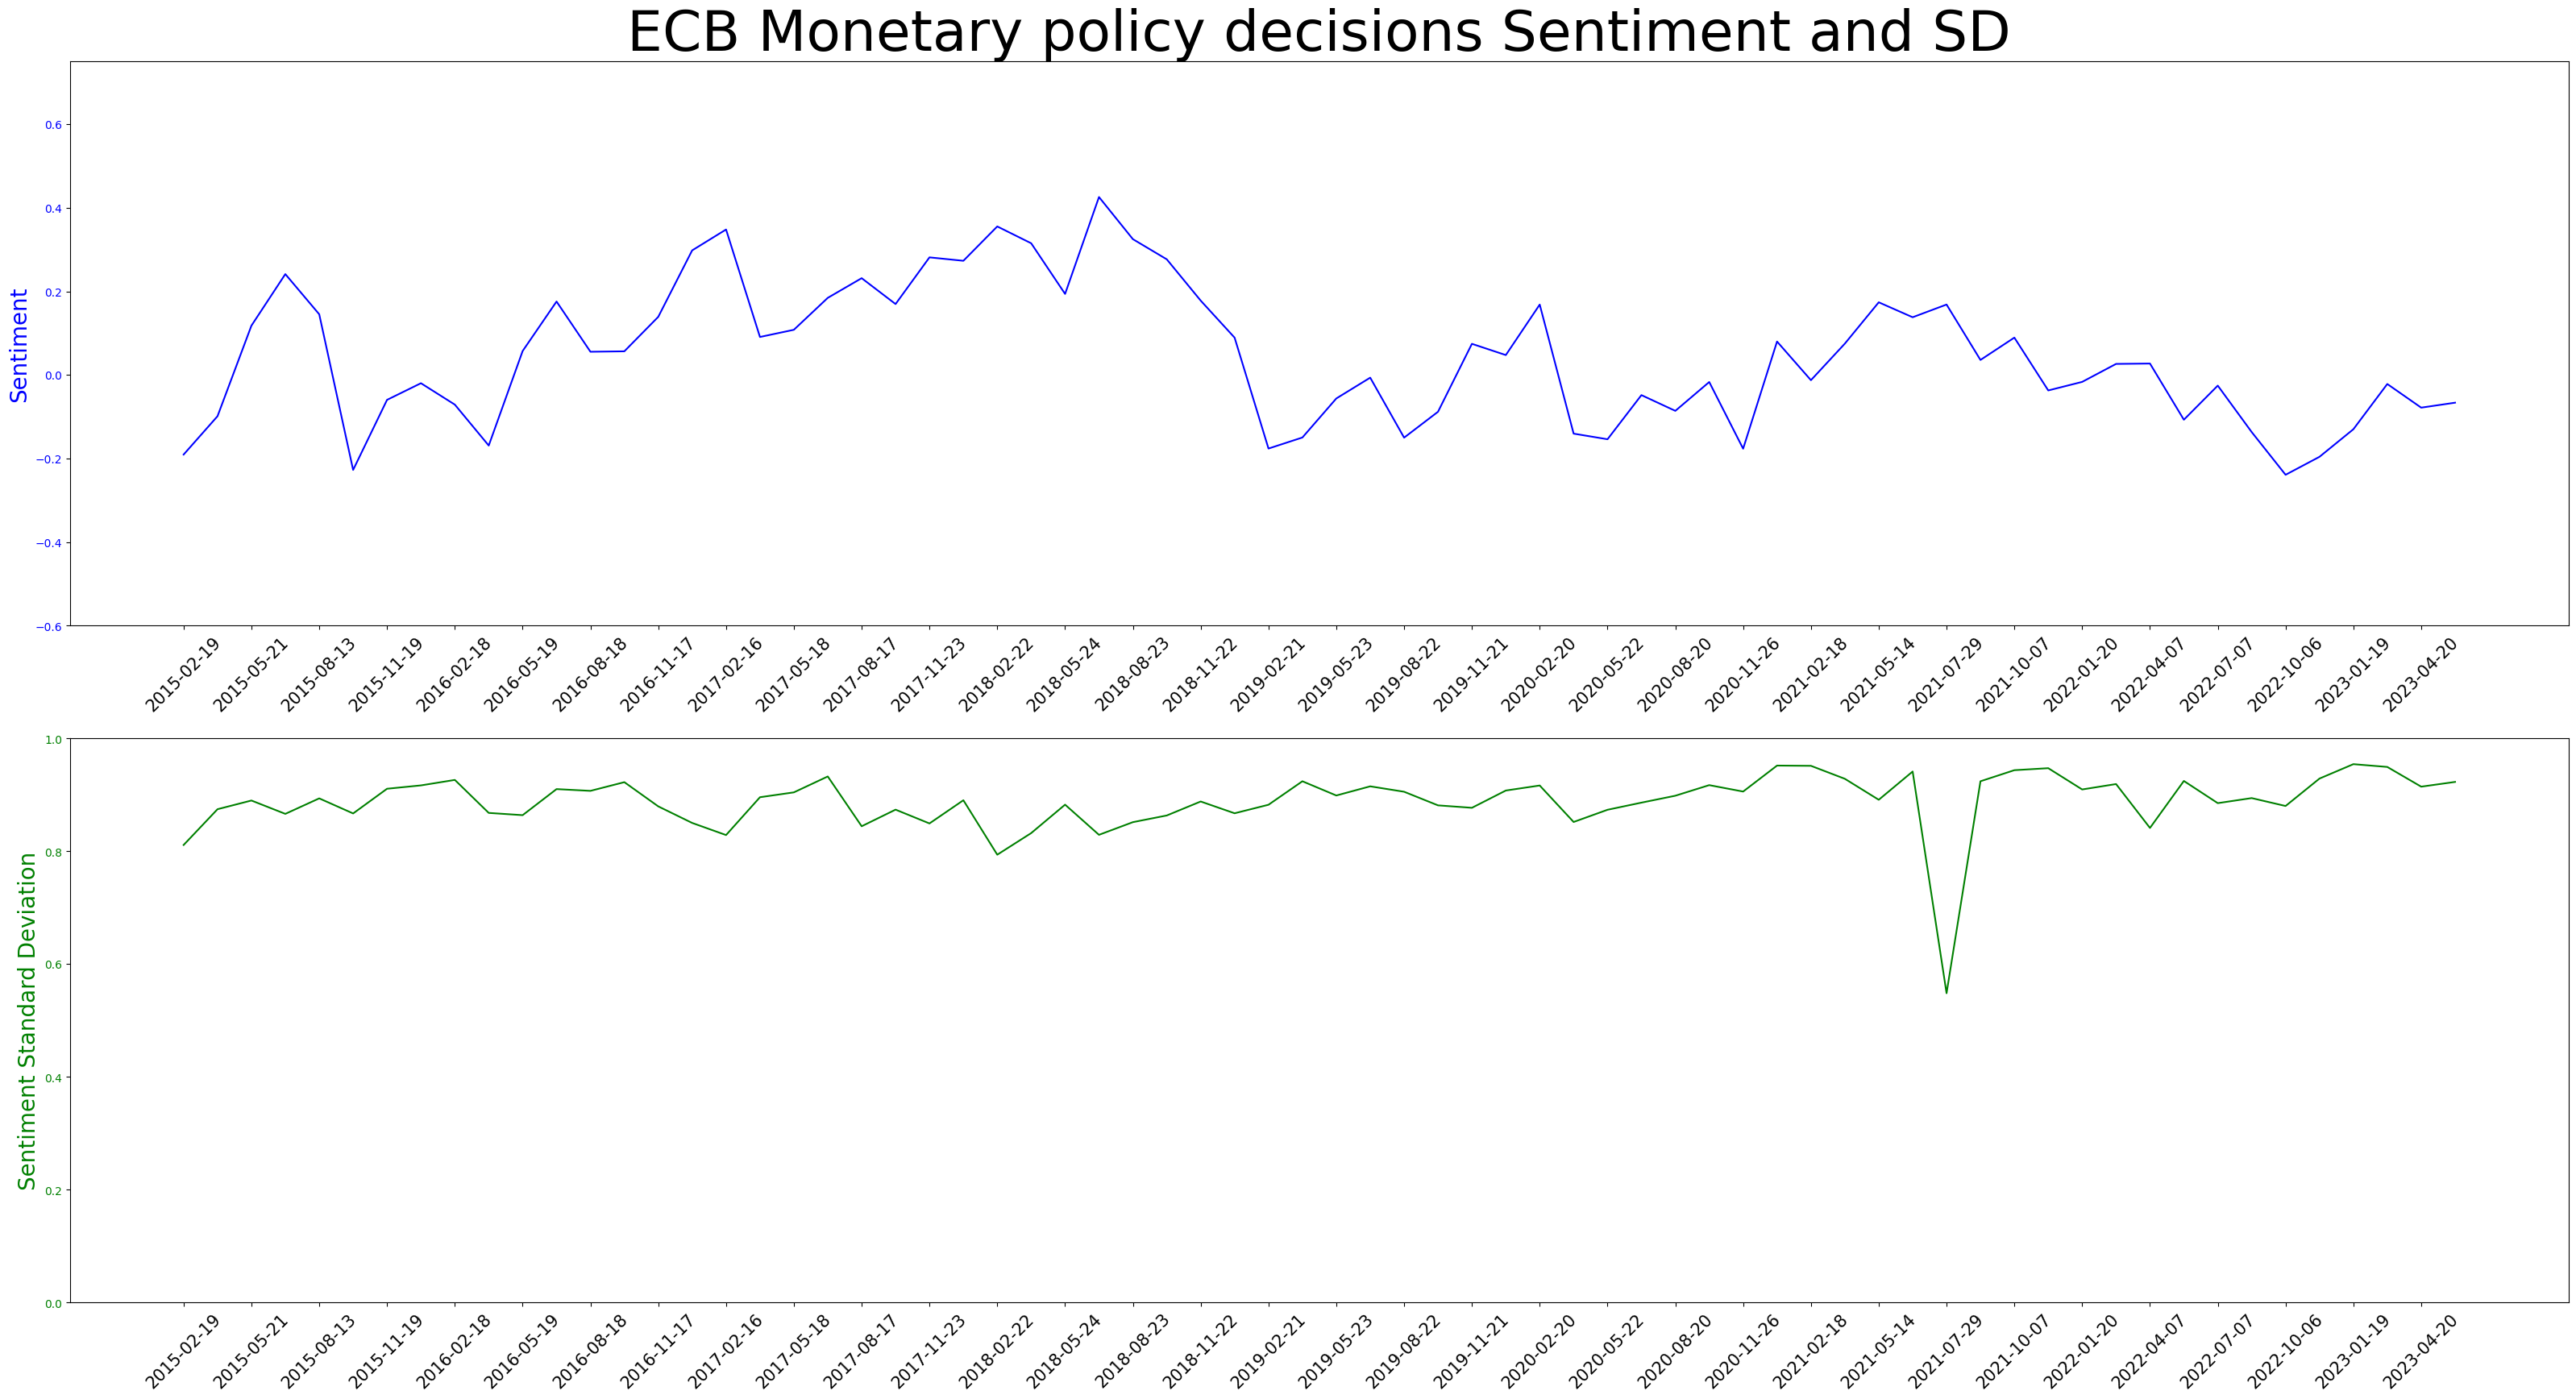

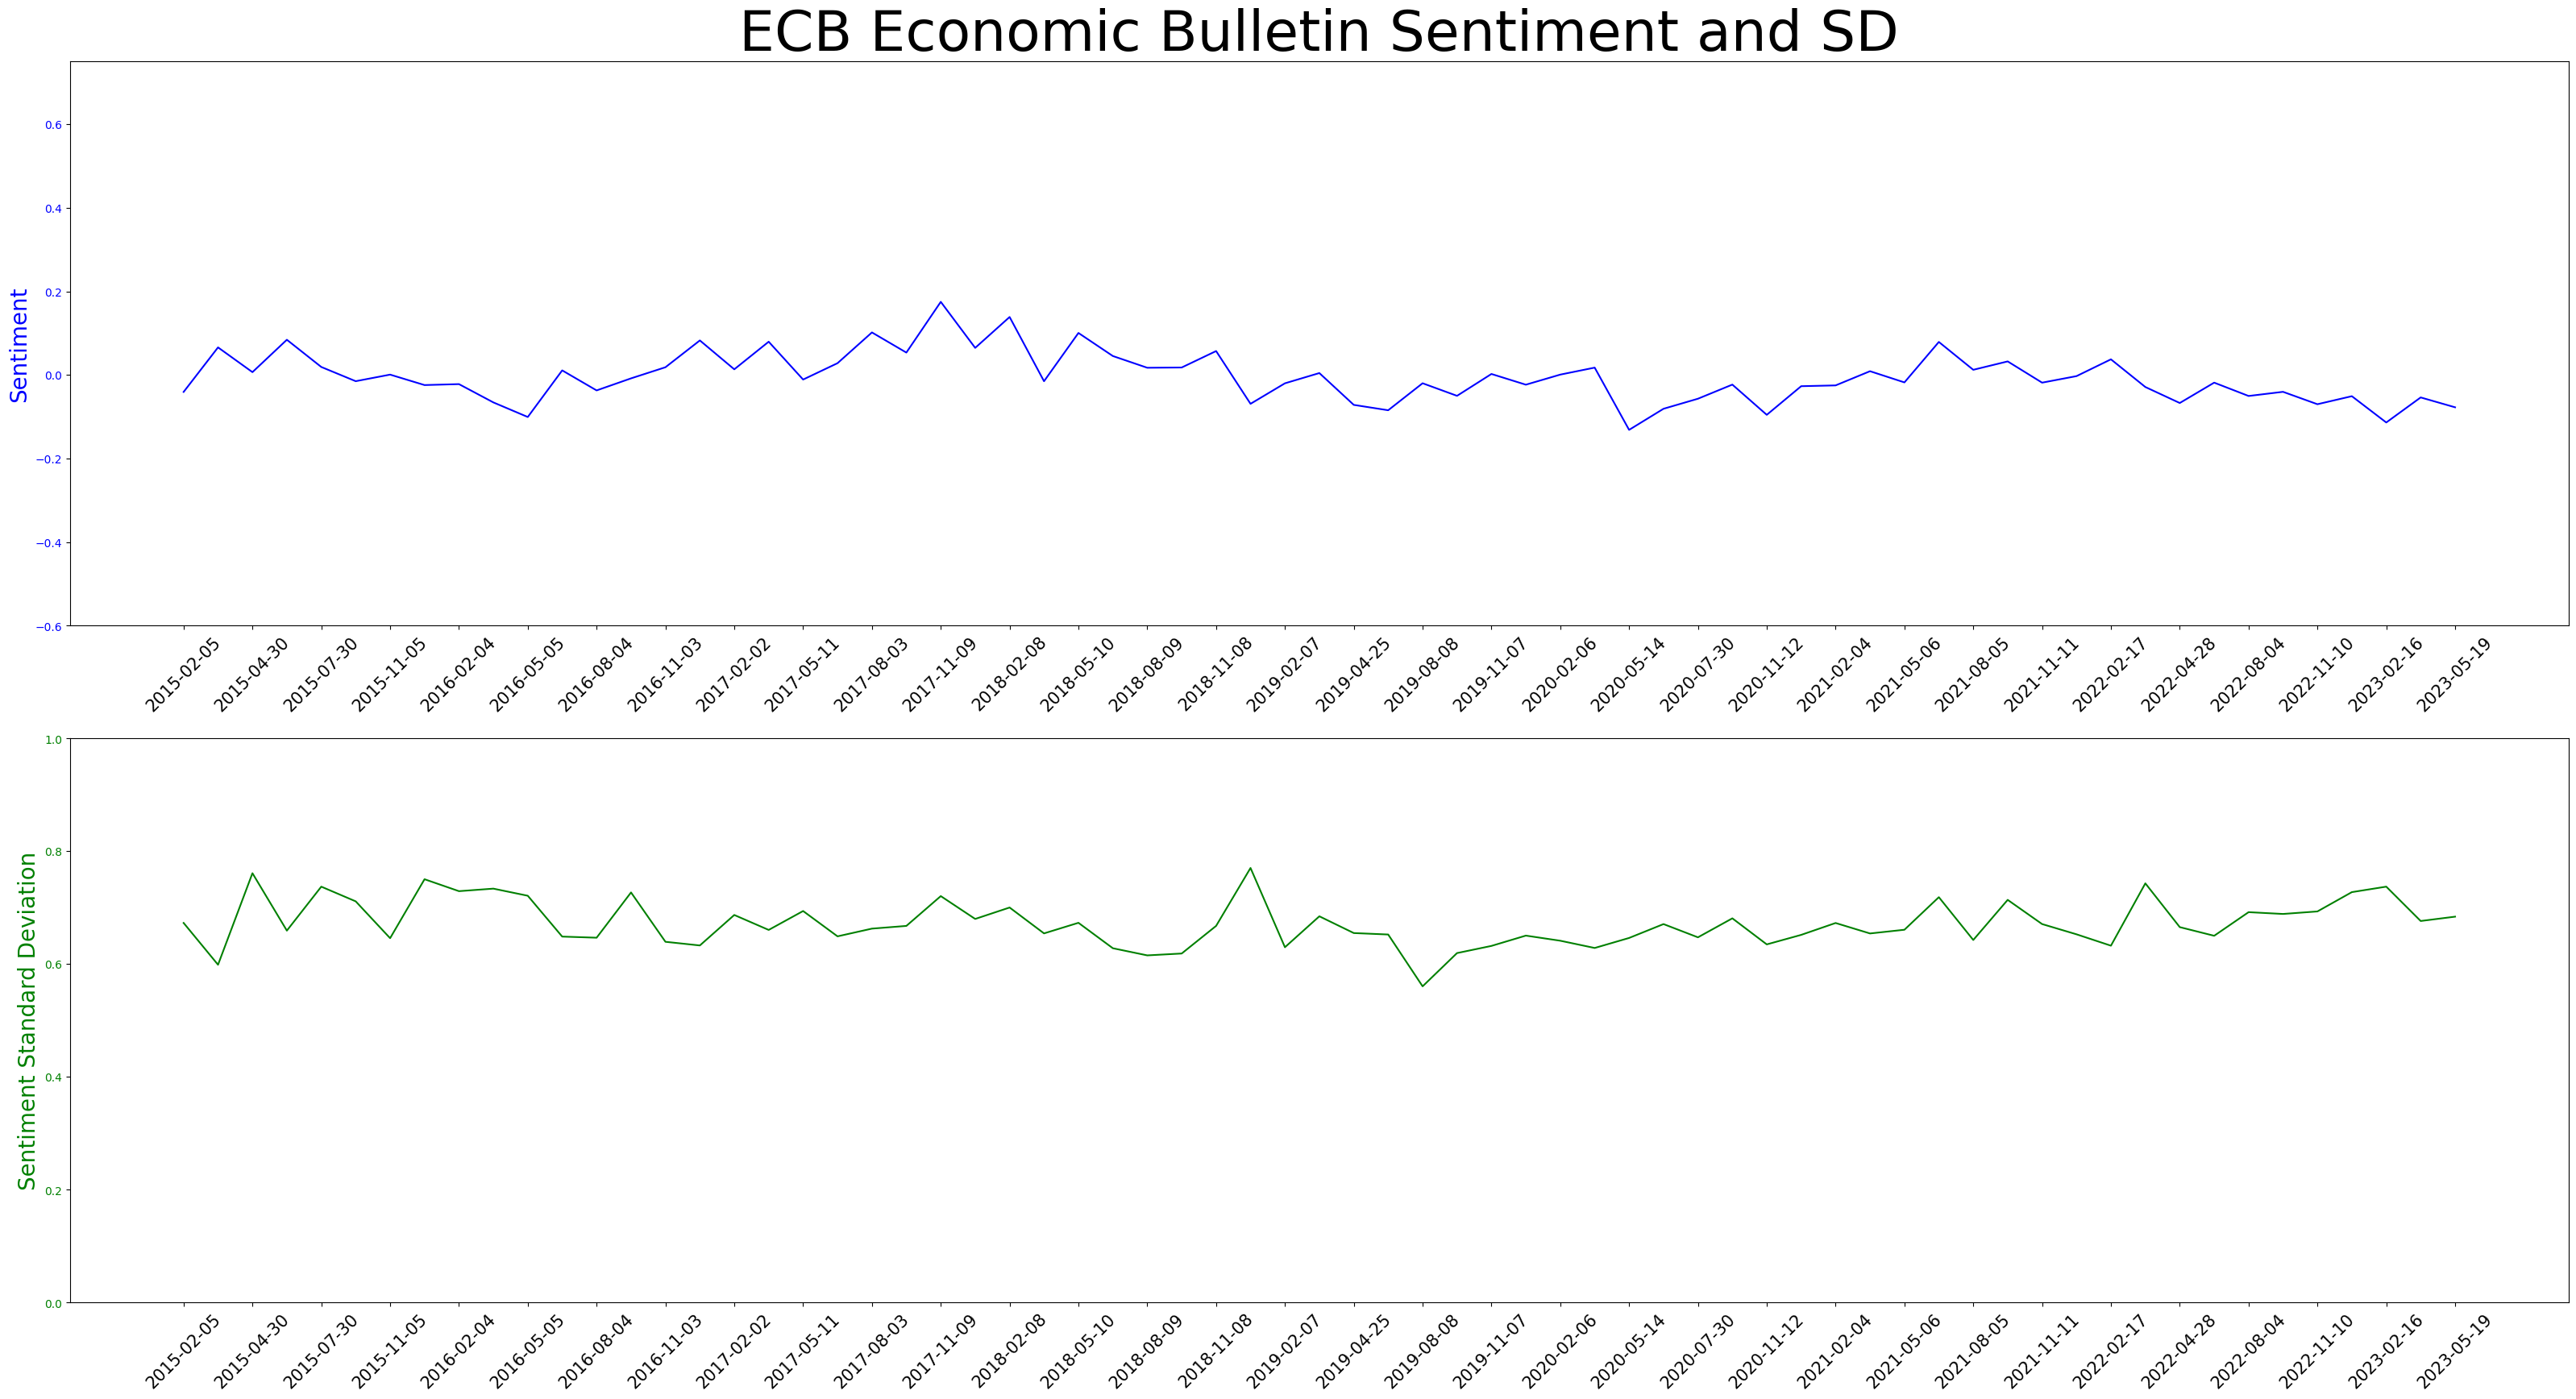

In [98]:

for i in ECB_list:
    Body = "ECB"
    Model = i
    Model_Subfolder = f'/{Body} Texts/{Model}'
    Model_Folder = config.Sentiment_models
    df1 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short.csv")
    df2 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short_2.csv")
    
    df_var = df1[['date', 'sentiment']]
    df_var = df_var.groupby(['date']).agg(["mean", "median", "var"]).reset_index()
    df_var.columns = ['_'.join(col).strip() for col in df_var.columns.values]
    df_var = df_var.rename(columns={'date_': 'date'})
    df_var['sentiment_sd'] = df_var['sentiment_var']**0.5
    df_var = df_var.rename(columns={'sentiment_sd': 'sd'})
    
    df1 = df1[['date',  'positive', 'negative', 'neutral', 'sentiment']]
    df1 = df1.groupby(['date']).mean().reset_index()
        
    # Create a list of x-axis tick positions
    num_ticks = 30  # Adjust this number as needed
    x_tick_positions_0 = df1['date'].iloc[::len(df1) // num_ticks].tolist()
    x_tick_positions_1 = df_var['date'].iloc[::len(df_var) // num_ticks].tolist()

    fig, axs = plt.subplots(2, 1, figsize=(40, 20))
    #axs = [axs, axs.twiny()]

    axs[0].plot(df1['date'], df1['sentiment'], color='blue')

    #axs[1] = axs[0].twinx()
    axs[1].plot(df_var['date'], df_var['sd'], color='green')

    axs[0].tick_params(axis='y', labelcolor='blue')
    axs[1].tick_params(axis='y', labelcolor='green')

    # Set Y axis scales so that they both fit evenly on the chart
    axs[0].set_ylim(-0.6, 0.75)
    axs[1].set_ylim(0, 1)

    axs[0].set_xticks(x_tick_positions_0)
    axs[1].set_xticks(x_tick_positions_1)

    axs[0].tick_params(axis='x', rotation=45, labelsize=15)
    axs[1].tick_params(axis='x', rotation=45, labelsize=15)

    axs[0].set_ylabel('Sentiment', color='blue', fontsize=20)
    axs[1].set_ylabel('Sentiment Standard Deviation', color='green', fontsize=20)

    axs[0].set_title(f'{Body} {Model} Sentiment and SD', fontsize=50)

    #Set graph name for output file 
    graph_name = f"{Body}_{Model}_Sentiment_SD.png"
    plt.savefig(f"/Users/kylenabors/Documents/Database/Other Data/Graph Photos/{graph_name}")
    plt.show()